<strong>Abstract</strong>  
In this notebook, Intermediate outputs of convolutional neural networks will be visualized.

<strong>Reference</strong>  
See pages 160-166 of "<strong>Deep Learning with Python</strong>" by Francois Chollet (2018). 

<strong>Summary (page 160)</strong>  
Visualization of intermediate outputs of convnet (intermediate activations) is useful for understanding how successive convnet layers transform their input and for getting an idea of the meaning of individual convnet filters.

# Model preparation

In [1]:
from google import colab
colab.drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Let us check available models saved in *.h5 files.

In [12]:
import glob
datpath= '/content/gdrive/My Drive/Colab Notebooks/Deep_Learning_with_Python_Chollet/cats_and_dogs/train' 

model_list=glob.glob(datpath + '/*.h5')

print("Available models:{}".format(model_list))

Available models:['/content/gdrive/My Drive/Colab Notebooks/Deep_Learning_with_Python_Chollet/cats_and_dogs/train/model1_without_augmentation_and_dropout.h5', '/content/gdrive/My Drive/Colab Notebooks/Deep_Learning_with_Python_Chollet/cats_and_dogs/train/model4_fine_tuning.h5', '/content/gdrive/My Drive/Colab Notebooks/Deep_Learning_with_Python_Chollet/cats_and_dogs/train/model3_transfer_learning.h5', '/content/gdrive/My Drive/Colab Notebooks/Deep_Learning_with_Python_Chollet/cats_and_dogs/train/model2_with_augmentation_and_dropout.h5']


The parameter model_num specifies which model you want to choose.

In [43]:
from keras.models import load_model

model_num=3

print(model_list[model_num])
model = load_model(model_list[model_num])
model.summary()

/content/gdrive/My Drive/Colab Notebooks/Deep_Learning_with_Python_Chollet/cats_and_dogs/train/model2_with_augmentation_and_dropout.h5
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)   

In the next cell, you can pick up a picture of a dog or a cat.

(1, 150, 150, 3)


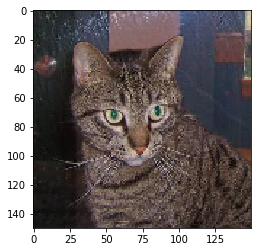

In [44]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path= '/content/gdrive/My Drive/Colab Notebooks/Deep_Learning_with_Python_Chollet/cats_and_dogs/train/cat.1.jpg' 

img=image.load_img(img_path, target_size = (150,150))
img_tensor=image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()

In [45]:
from keras import models

layer_outputs = [layer.output for layer in model.layers] # extracts the outputs of all layers
activation_model = models.Model(inputs=model.input, outputs= layer_outputs) # creates a model that will return these outputs.
activations = activation_model.predict(img_tensor) # activations

for j in range(len(model.layers)):
  print(activations[j].shape)

(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 72, 72, 64)
(1, 36, 36, 64)
(1, 34, 34, 128)
(1, 17, 17, 128)
(1, 15, 15, 128)
(1, 7, 7, 128)
(1, 6272)
(1, 6272)
(1, 512)
(1, 1)


In [0]:
def visualize_activations(i):

  plt.figure(figsize=(18,18))
  
  for k in range(20):
    if k*k >= activations[i].shape[-1]:
      break      

  for j in range(activations[i].shape[-1]):
    plt.subplot(k,k,j+1)
    plt.imshow(activations[i][0,:,:,j])
    plt.text(activations[i].shape[2]/140,activations[i].shape[2]/7,'%d'%(j+1), color='white', fontsize=14, bbox=dict(facecolor='black',alpha=0.8))
    plt.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)

  plt.subplots_adjust(wspace=0, hspace=0)
  plt.show()

# Visualization
## All channels in the first layer

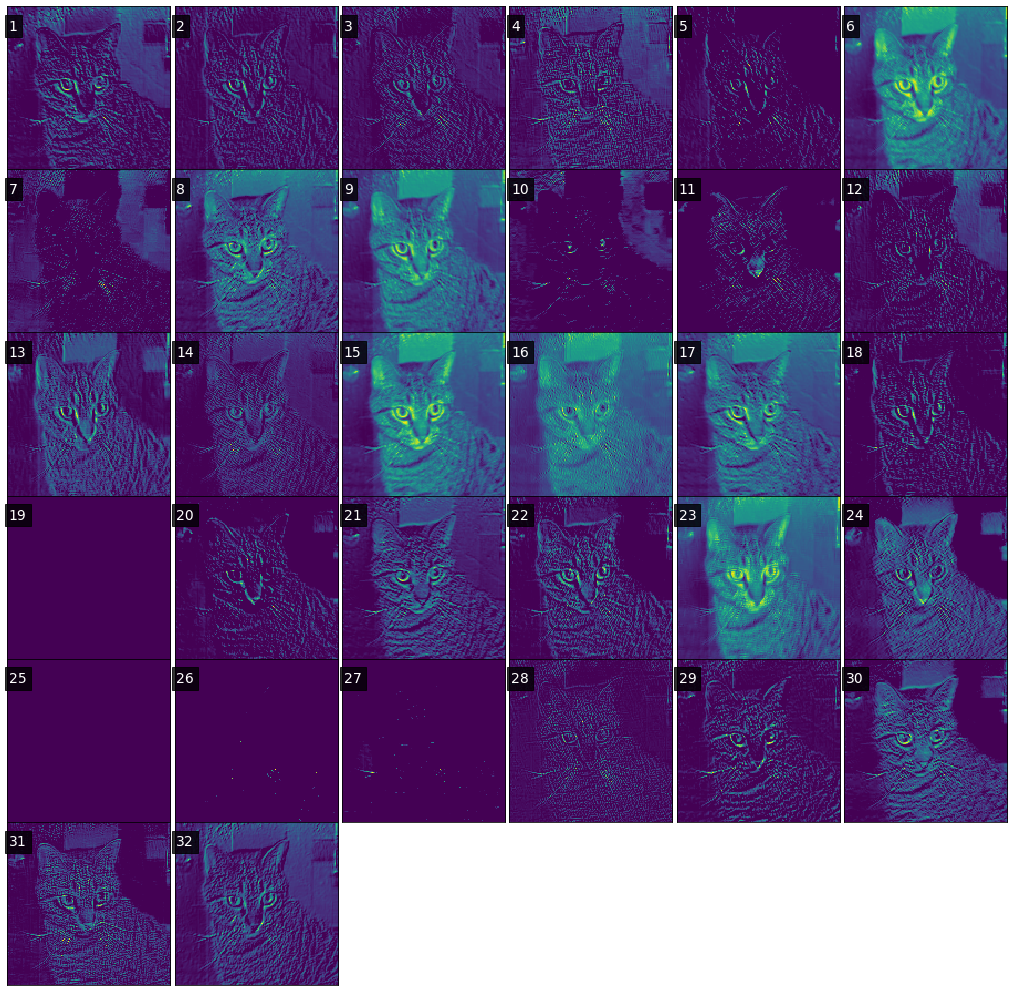

In [32]:
visualize_activations(0) # first layer

For instance, the 10-th channel of the activation of the first layer looks like a green-eyes detector. 

## Second layer

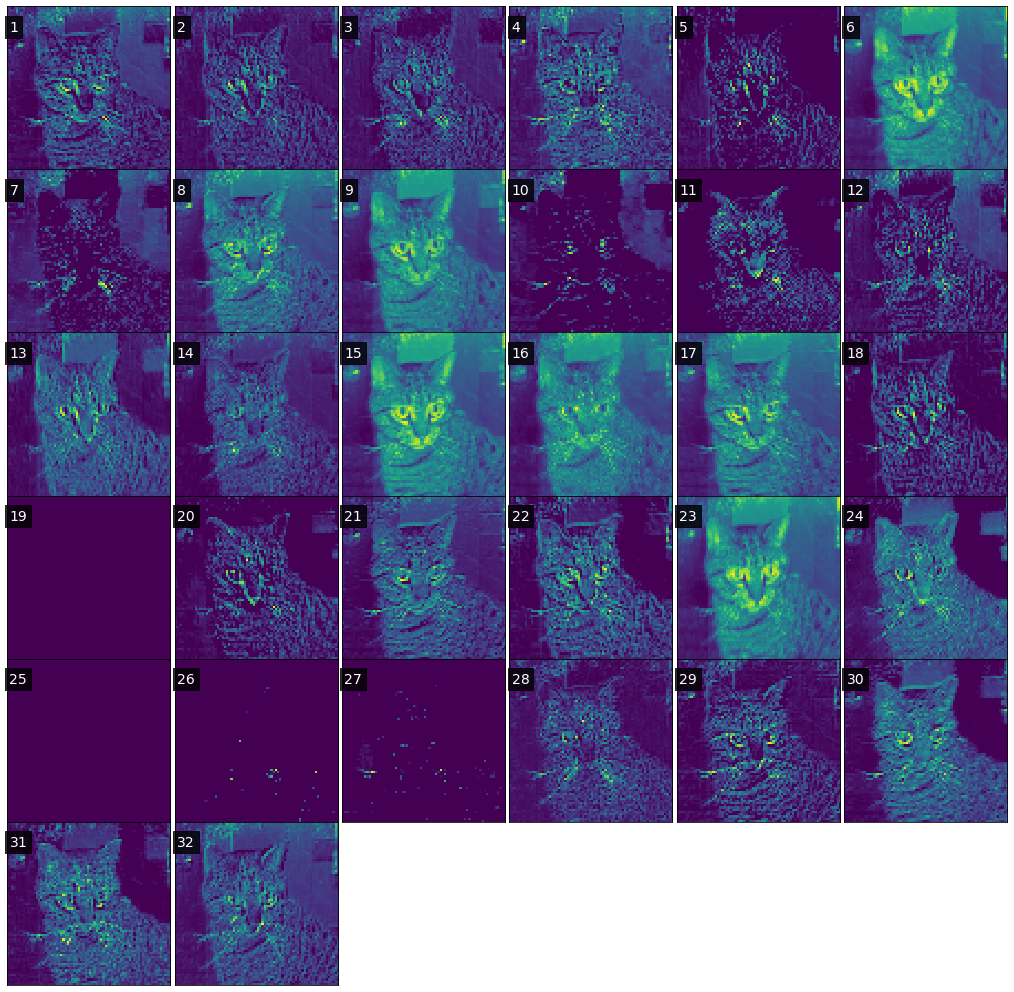

In [33]:
visualize_activations(1) # second layer

## Third layer

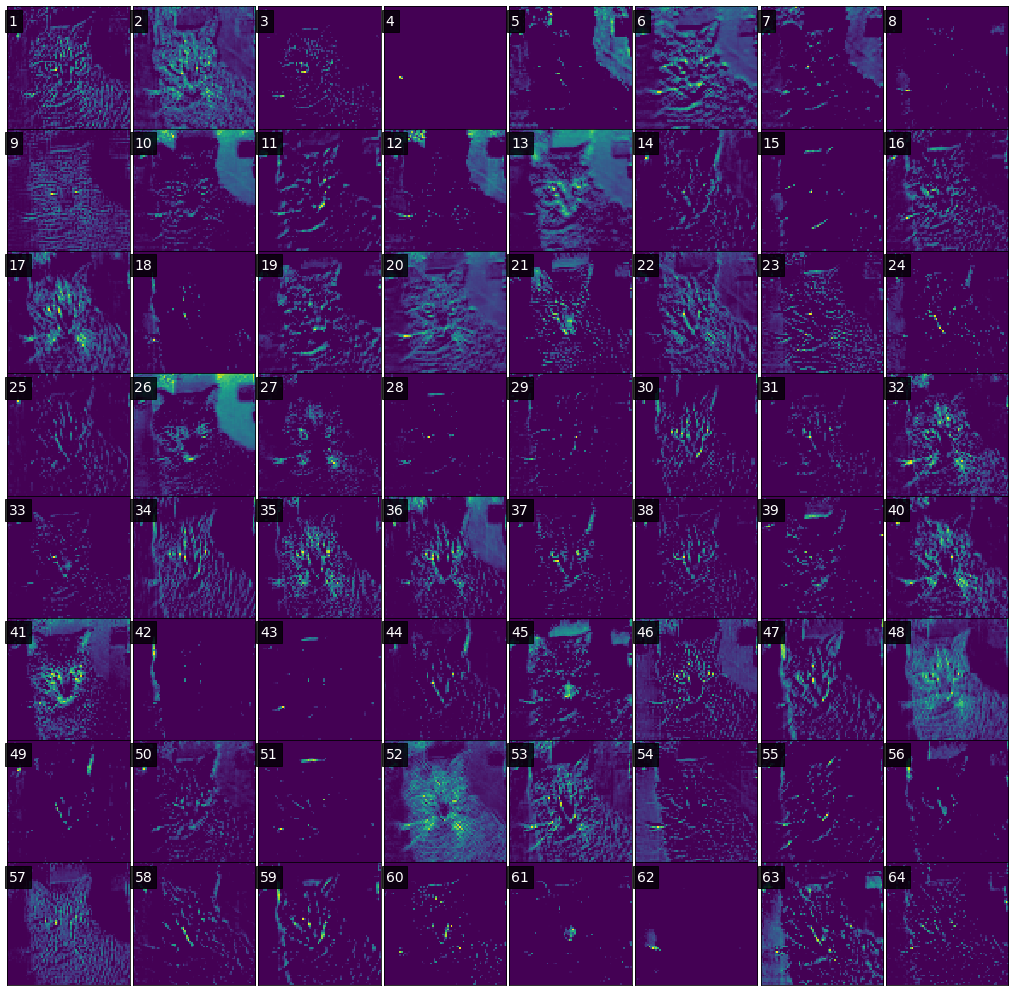

In [34]:
visualize_activations(2) # third layer

## Fourth layer

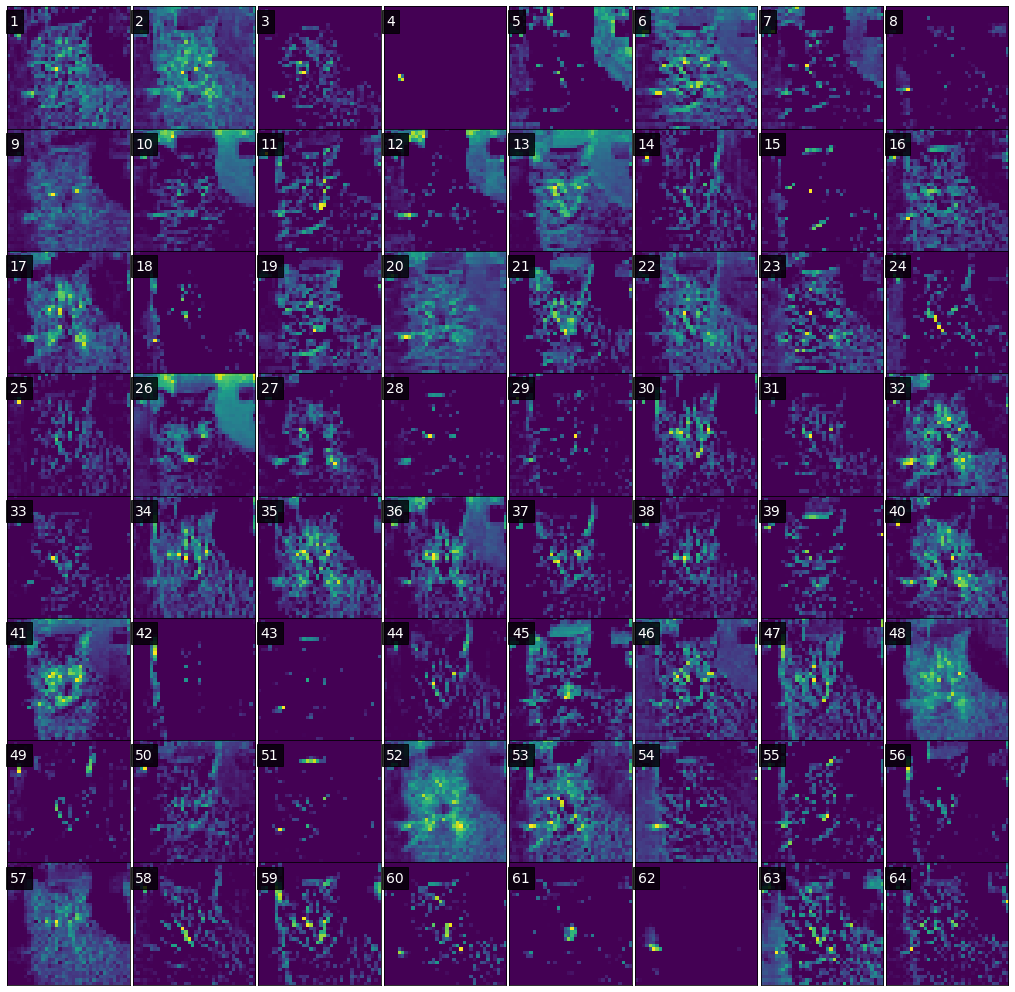

In [35]:
visualize_activations(3) # fourth layer

## Fifth layer

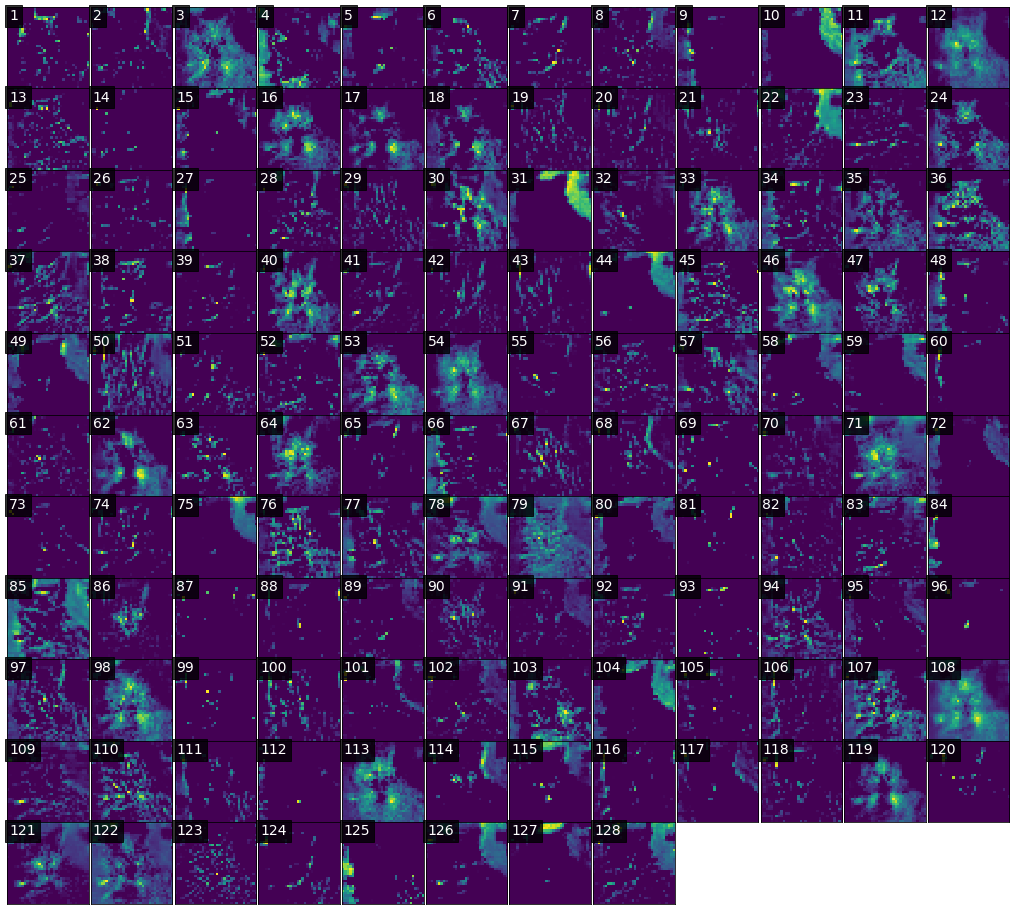

In [36]:
visualize_activations(4) # fifth layer

## Sixth layer

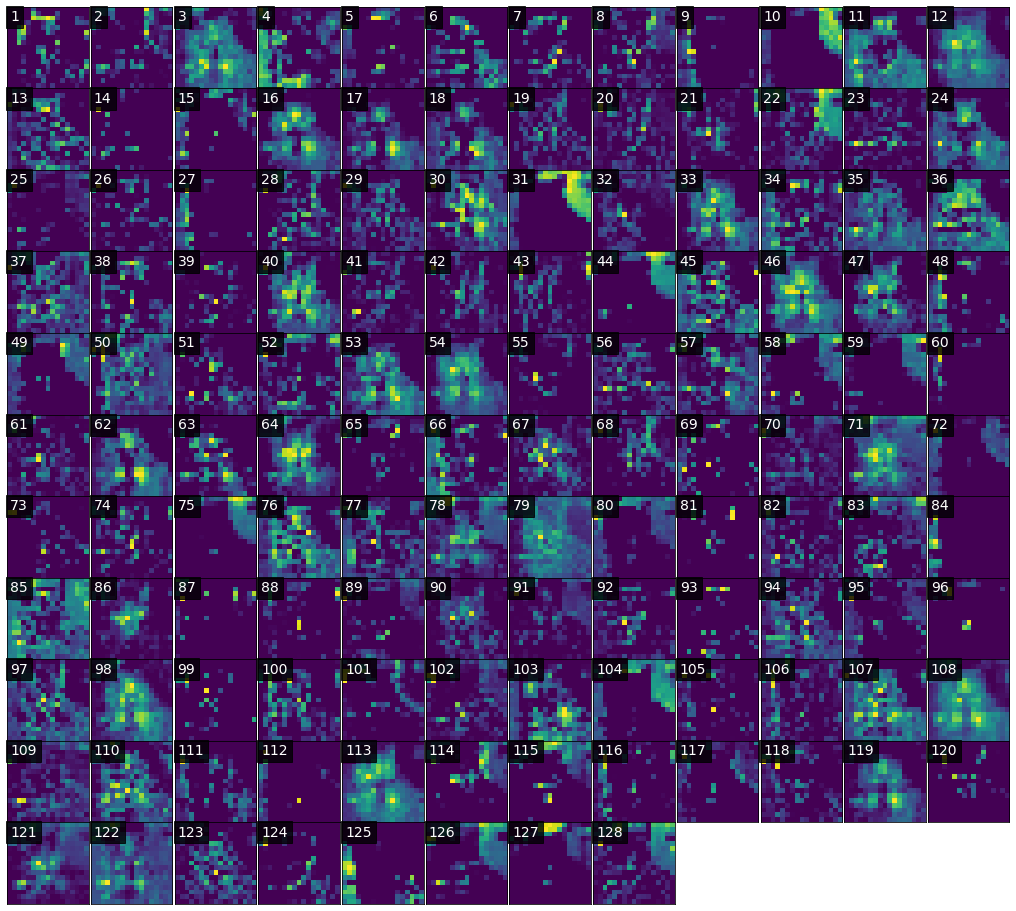

In [37]:
visualize_activations(5) # sixth layer

## Seventh layer

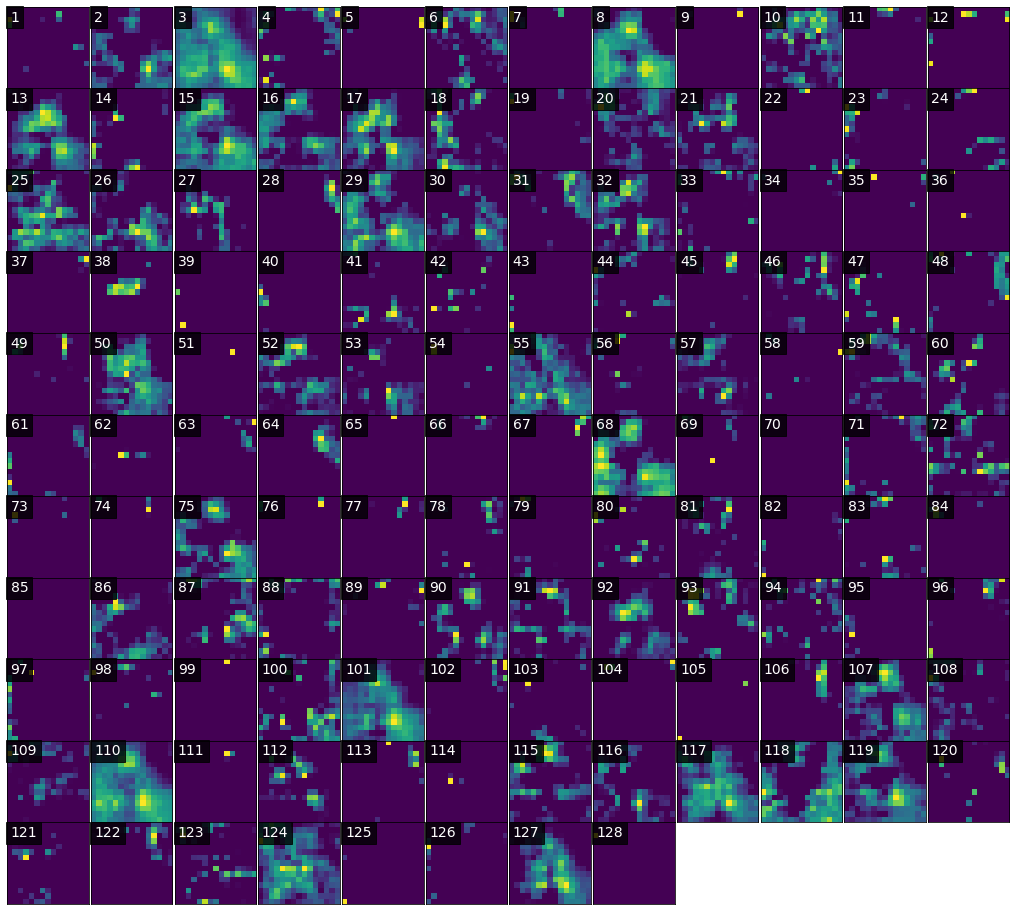

In [38]:
visualize_activations(6) # seventh layer

## Eighth layer

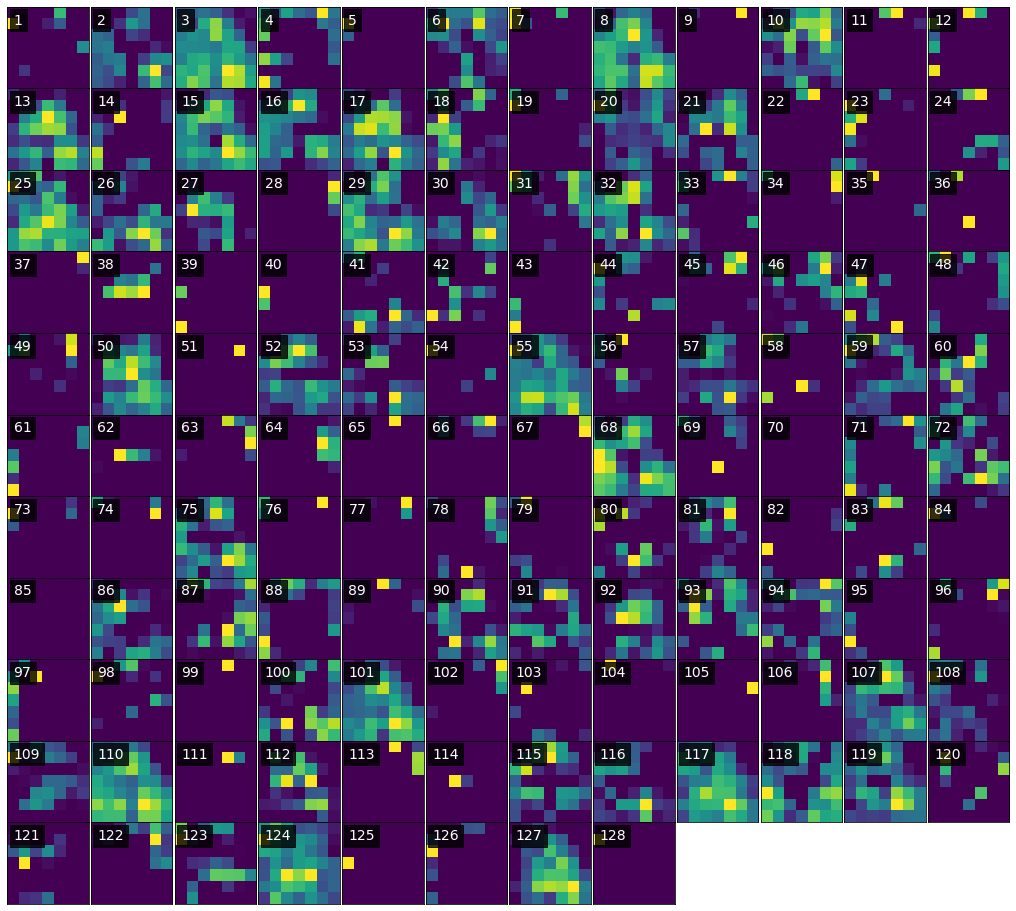

In [39]:
visualize_activations(7) # eighth layer

In the page 166, there are a few important notes.
- The first layer acts as a collection of various edge detectors. At that stage, the activations (i.e., the output of a layer) retain almost all of the information present in the initial picture.
- As you go deeper, the activations become more abstract and less visually interpretable. They begin to encode higher-level concepts such as "cat ear" and "cat eye."